# ***Solar Cells Characterization in darkness and under light***  
The measurements are located in "Practice No 6.txt" file.
They were separated in different files to ease their analysis:
1. "I_V_darkness.txt" corresponds to the cell in darkness
2. "I_V_light.txt" corresponds to the cell under light  

The material of the solar cell is Si with an area of $0.16 cm^2$ and the characterization was made with a solar simulator with a AM1.5 filter at a radiation intensity of $100\frac{mW}{cm^2}$ and at a room temperature of $25°C$.   
We will study the electric properties of this cell such as:  
* Saturation current $I_{S}$
* Ideality Factor $n$
* Short-circuit current $I_{SC}$
* Open-circuit Voltage $V_{OC}$
* Maximum Power $P_{mp}$
* Fill Factor $FF$  
* Efficiency of energy conversion $η$
* Characteristic Resistance $R_{CH}$

## Loading data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
from scipy.stats import linregress
from scipy import constants
from matplotlib.patches import Rectangle

Loading the measurements in darkness:

In [2]:
d_df = pd.read_csv(
    "I_V_curve_darkness.txt",
    sep="\t", header=None,
    names=["Voltaje (Volts)", "Corriente(Amperes)"],
    skiprows=1
)

d_df = d_df.rename(columns={"Voltaje (Volts)": "Voltage (V)", "Corriente(Amperes)": "Current (A)"})
d_df.loc[:, "In"] = "darkness"
d_df

,Voltage (V),Current (A),In
0,-0.7000,-1.135000e-07,darkness
1,-0.6858,-1.123000e-07,darkness
2,-0.6717,-1.124000e-07,darkness
3,-0.6576,-1.129000e-07,darkness
4,-0.6434,-1.118000e-07,darkness
...,...,...,...
95,0.6436,9.036000e-03,darkness
96,0.6577,1.139000e-02,darkness
97,0.6718,1.419000e-02,darkness
98,0.6860,1.750000e-02,darkness


Loading the measurements under light:

In [3]:
l_df = pd.read_csv(
    "I_V_curve_light.txt",
    sep="\t",
    names=["Voltaje (Volts)", "Corriente(Amperes)"],
    skiprows=1
)

l_df = l_df.rename(columns={"Voltaje (Volts)": "Voltage (V)", "Corriente(Amperes)": "Current (A)"})
l_df.loc[:, "In"] = "light"
l_df

,Voltage (V),Current (A),In
0,-0.7000,-0.004104,light
1,-0.6858,-0.004110,light
2,-0.6717,-0.004151,light
3,-0.6576,-0.004184,light
4,-0.6434,-0.004151,light
...,...,...,...
95,0.6436,0.008079,light
96,0.6577,0.010840,light
97,0.6718,0.014050,light
98,0.6860,0.017760,light


Creating one dataframe with all the measurements:

In [4]:
df = pd.concat([d_df, l_df], ignore_index=True)
df.dtypes

Voltage (V)    float64
Current (A)    float64
In              object
dtype: object

## I-V Characteristic Curves Obtainment  
The I-V characteristics of a Si solar cell with an area of $0.16$ $cm^2$ at a room temperature of $25$ $^{°}C$ ($298.15$ $K$) are obtained.

In [5]:
fig1 = px.line(
    df, x="Voltage (V)",
    y="Current (A)",
    color="In",
    markers=True,
    title="Fig.1: I-V Characteristic Curves of a Si solar cell in darkness and under light"
)

fig1.update_layout(title_x=0.5)
fig1.update_xaxes(linewidth=2, linecolor="black", mirror=True)
fig1.update_yaxes(linewidth=2, linecolor="black", mirror=True)
fig1.show()

From the above graph we can see that the photovoltaic current moves to negative values when the cell is illuminated. On the other hand, the current is almost null when the cell is in the darkness and when it is under ilumination it has constant values for the current until about $374.8$ $mV$, but the current starts to increase in both curves around $400$ $mV$.

## Obtaining $I_{S}$ and $n$

$I_{S}$ and $n$ will be calculated through the logarithm of the currents when there's darkness.

Remember that:    
$I=I_{S}(e^{\frac{qV}{nk_{B}T}}-1)$  
where *q* is the electron charge, *V* the voltage, $k_{B}$ the Boltzmann constant and *T* the temperature.  
If  $n\thickapprox1$ , it will have a diffusion current and when $n\thickapprox2$ , it will have a recombination current.  
From the previous equation, if $\frac{qV}{nk_{B}T}$ $\geq$ *3*, the exponential term dominates and we have:  
$I=I_{S}e^{\frac{qV}{nk_{B}T}}$  
Applying natural logarithm:  
$ln(I)=ln(I_{S}) + \frac{qV}{nk_{B}T}$  
To find $I_{S}$ and *n*, we make $V=0$ and then $a=\frac{q}{nk_{B}T}$ and $b=ln(I_{S})$ and we have  
$I_{S}=e^{b}$  
$n=\frac{q}{ak_{B}T}$

Let's calculate $ln(I)$ for the cell when it is in darkness.

In [6]:
drk_df = d_df.copy()
# Because of the negative values of the current, we drop the errors
drk_df["ln(I)"] = np.log(drk_df["Current (A)"])
drk_df = drk_df.dropna()

c:\Users\Memo\Documents\Proyectos Python\solar_cells_characterization\.env\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning:

invalid value encountered in log



Let's check which part of the curve presents a linear behaviour

In [7]:
fig2 = px.line(
    drk_df,
    x="Voltage (V)",
    y="ln(I)",
    markers=True,
    title="Fig.2: ln(I) vs Voltage",
)

fig2.update_layout(title_x=0.5)
fig2["data"][0]["showlegend"] = True
fig2["data"][0]["name"] = "Darkness"
fig2.show()

From the graph we can see that from $389$ $mV$ approximately, the curve presents a linear behaviour.  

Adjusting this part of the curve:

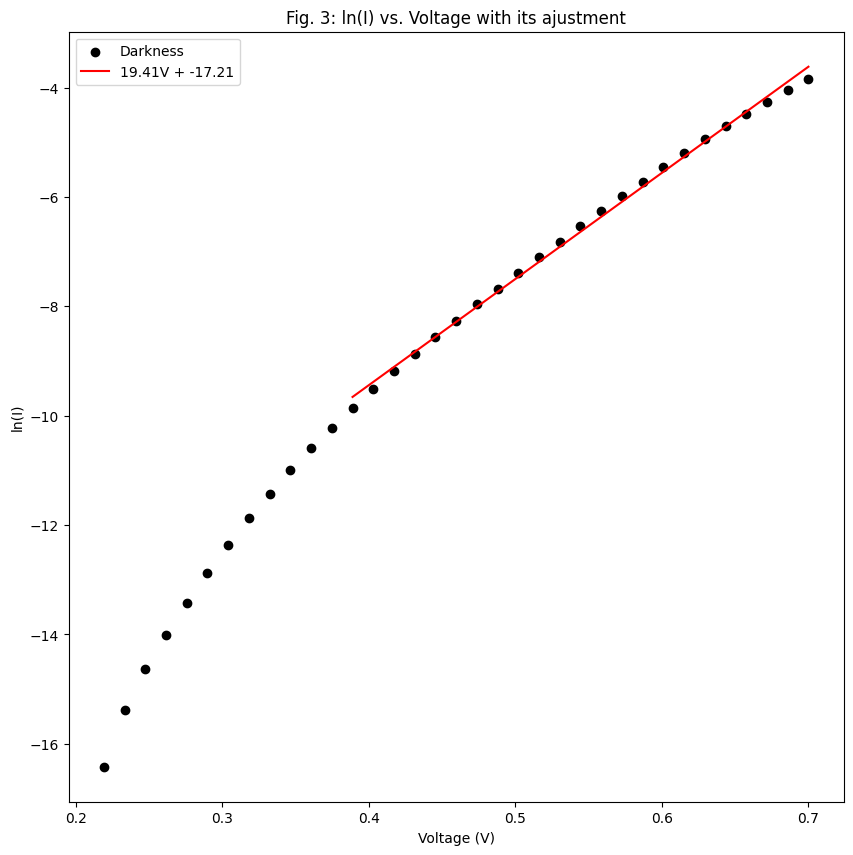

In [8]:
slope, inter, r, p, se = linregress(
    x=drk_df.loc[drk_df["Voltage (V)"] > 0.3748]["Voltage (V)"],
    y=drk_df.loc[drk_df["Voltage (V)"] > 0.3748]["ln(I)"]
)
fig3, ax = plt.subplots(figsize=(10, 10))
ax.scatter(data=drk_df, x="Voltage (V)", y="ln(I)", color="black")
ax.plot(
    drk_df.loc[drk_df["Voltage (V)"] > 0.3748]["Voltage (V)"],
    slope * drk_df.loc[drk_df["Voltage (V)"] > 0.3748]["Voltage (V)"] + inter, 
    color="red"
)
ax.set_title("Fig. 3: ln(I) vs. Voltage with its ajustment")
ax.set_xlabel("Voltage (V)")
ax.set_ylabel("ln(I)")
plt.legend(["Darkness", f"{round(slope, 2)}V + {round(inter, 2)}"])
plt.show()

With the values of the slope (a) and intercept (b), $I_{S}$ and $n$ will be caluclated.

For $I_{S}$:

In [9]:
I_s = np.exp(inter)
print(f"I_s={I_s} A")

I_s=3.3613586597667936e-08 A


Doing a conversion, we have a saturation current of $I_{S}=33.61$ $nA$.

For $n$:

In [10]:
kelvin_temp = 25 + 273.15
n = (constants.elementary_charge) / ((slope * constants.Boltzmann * kelvin_temp))
print(f"n={n}")

n=2.0049891292371247


We obtain a ideality factor of $n=2$, so we have a recombination current.

## Obtaining $I_{SC}$ and $V_{OC}$

We can calculate these properties taking the average of the closest values to the "Voltage (V)" and "Current (A)" axes when the cell is under illumination. We can see these values in Fig. 1.

Calculating $I_{SC}$:

In [11]:
value_1 = l_df.loc[l_df["Voltage (V)"] == -0.006948]["Current (A)"].values[0]
value_2 = l_df.loc[l_df["Voltage (V)"] == 0.007107]["Current (A)"].values[0]
I_sc = (value_1 + value_2) / 2
print(f"I_sc={I_sc} A")

I_sc=-0.00412 A


We obtain a short-circuit current of $I_{SC}=4.12$ $mA$. 

Calculating $V_{OC}$:

In [12]:
value_3 = l_df.loc[l_df["Voltage (V)"] == 0.5728]["Voltage (V)"].values[0]
value_4 = l_df.loc[l_df["Voltage (V)"] == 0.587]["Voltage (V)"].values[0]
V_oc = (value_3 + value_4) / 2
print(f"V_oc={V_oc} V")

V_oc=0.5799 V


We obtain an open-circuit voltage of $V_{OC}=579.9$ $mV$.

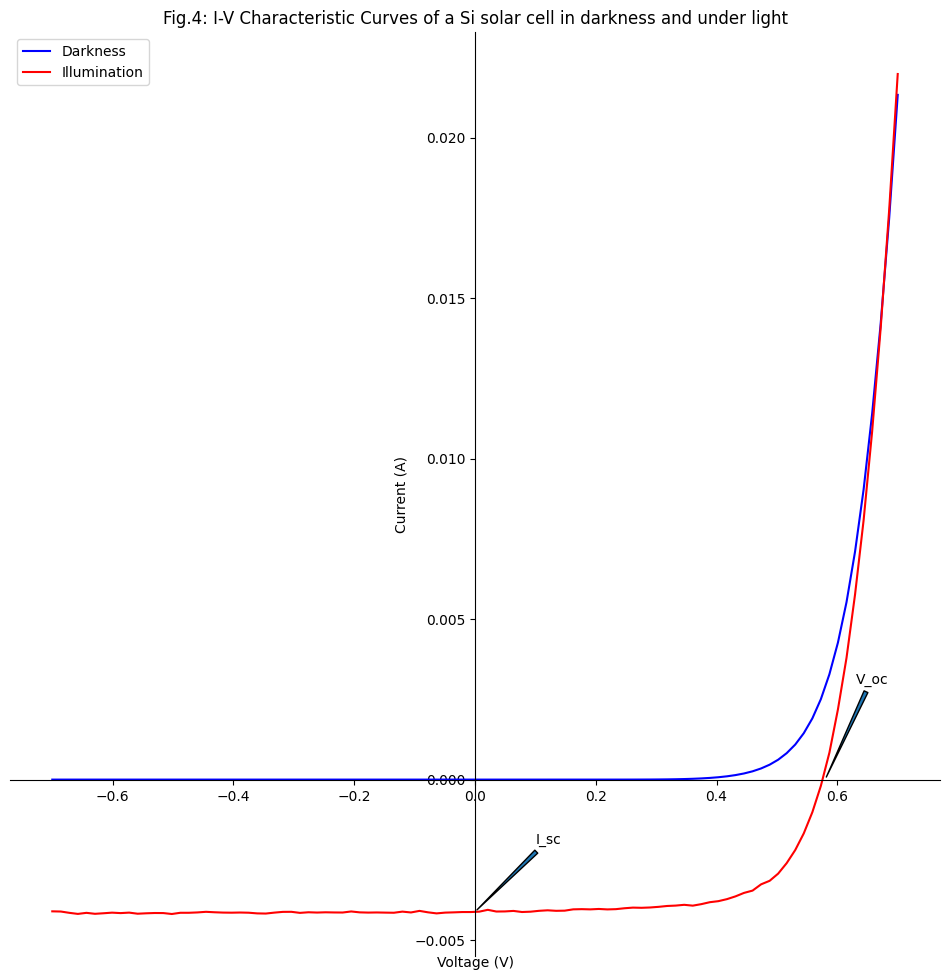

In [13]:
fig4 = plt.figure(figsize=(12, 12))
div = sns.lineplot(
    data=d_df,
    x=d_df["Voltage (V)"],
    y=d_df["Current (A)"],
    label="Darkness",
    color="blue",
)
iiv = sns.lineplot(
    data=l_df,
    x=l_df["Voltage (V)"],
    y=l_df["Current (A)"],
    label="Illumination",
    color="red",
)
ax = plt.gca()
iiv.set_title("Fig.4: I-V Characteristic Curves of a Si solar cell in darkness and under light")
plt.annotate(
    "V_oc", xy=(V_oc, 0), xycoords="data", xytext=(0.63, 0.003),
    textcoords="data", arrowprops=dict(arrowstyle="wedge", connectionstyle="arc3,rad=0.")
)
plt.annotate(
    "I_sc", xy=(0, I_sc), xycoords="data", xytext=(0.1, -0.0020),
    textcoords="data", arrowprops=dict(arrowstyle="wedge", connectionstyle="arc3,rad=0.")
)
ax.xaxis.set_label_coords(0.5, 0)
ax.spines["top"].set_color("none")
ax.spines["bottom"].set_position("zero")
ax.spines["right"].set_color("none")
ax.spines["left"].set_position("zero")
plt.show()

## Obtaining $P_{mp}$

In Fig. 1, when the cell is under illumination, we can see that the maximum power can't belong to the points where $V=0$ or $I=0$. In other words, $P=0$ where $I_{SC}$ and $V_{OC}$ are located, because there is no voltage when we consider $I_{SC}$ and there is no current when we consider $V_{OC}$. To see the point of the maximum power we can multiply the current by a "-" sign and then calculate the power.

Let's calculate the power considering the "-" in the current of the cell:

In [14]:
lght_df = l_df.copy()
lght_df["Power (W)"] = -(lght_df["Voltage (V)"] * lght_df["Current (A)"])

Graphing P vs Voltage:

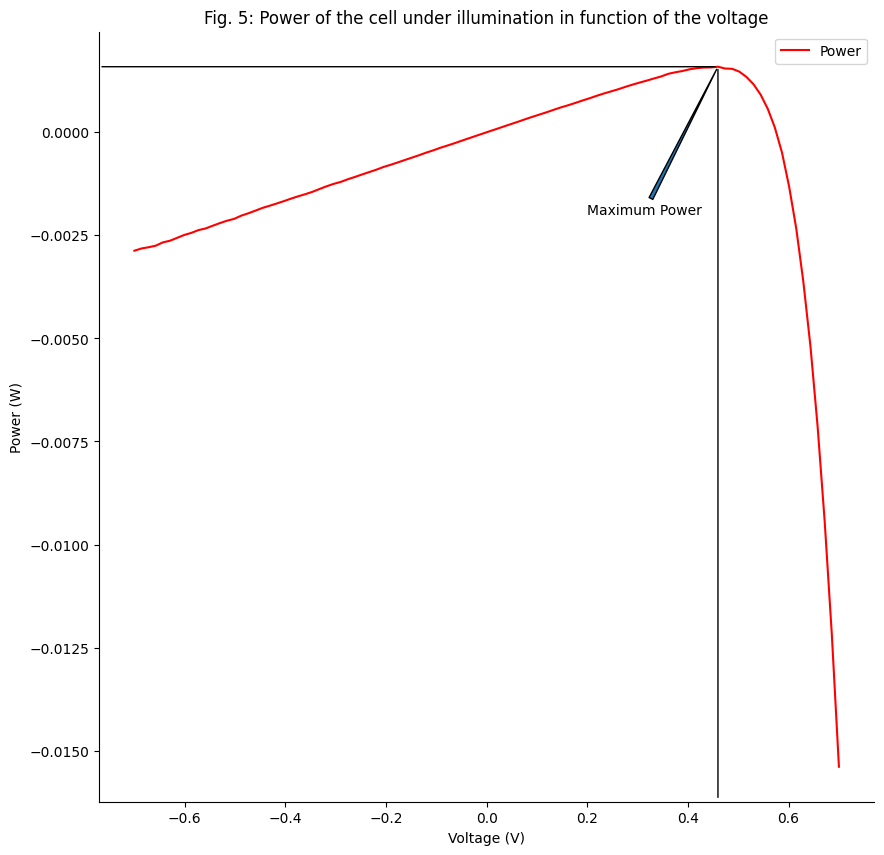

In [15]:
fig5, ax = plt.subplots(figsize=(10, 10))
power = sns.lineplot(data=lght_df, x="Voltage (V)", y="Power (W)", color="red")
plt.title("Fig. 5: Power of the cell under illumination in function of the voltage")
plt.legend(labels=["Power"])
# Finding the maximum power in the graph
x_c = lght_df.loc[lght_df["Power (W)"] == lght_df["Power (W)"].max()]["Voltage (V)"].values[0]
y_c = lght_df.loc[lght_df["Power (W)"] == lght_df["Power (W)"].max()]["Power (W)"].values[0]
plt.annotate(
    "", xy=(x_c, -0.0162), xycoords="data", xytext=(x_c, y_c),
    textcoords="data", arrowprops=dict(arrowstyle="-", connectionstyle="arc3,rad=0.")
)
plt.annotate(
    "", xy=(-0.77, y_c), xycoords="data", xytext=(x_c, y_c),
    textcoords="data", arrowprops=dict(arrowstyle="-", connectionstyle="arc3,rad=0.")
)
plt.annotate(
    "Maximum Power", xy=(x_c, y_c), xycoords="data", xytext=(0.2, -0.0020),
    textcoords="data", arrowprops=dict(arrowstyle="wedge", connectionstyle="arc3,rad=0.")
)
ax.spines["top"].set_color("none")
ax.spines["right"].set_color("none")
plt.show()

We can see the maximum power of the cell at the crest of the graph. Thus, we have:

In [16]:
max_points = lght_df.loc[lght_df["Power (W)"] == lght_df["Power (W)"].max()]
I_pm = max_points["Current (A)"].values[0]
V_pm = max_points["Voltage (V)"].values[0]
P_mp = max_points["Power (W)"].values[0]
print(f"I_pm={-I_pm} A, V_pm={V_pm} V, P_mp={P_mp} W")

I_pm=0.003458 A, V_pm=0.4597 V, P_mp=0.0015896426 W


We have calculated a maximum current of $I_{pm}=3.46$ $mA$, a maximum voltage of $V_{pm}=459.7$ $mV$ and a maximum power of $P_{mp}=1.59$ $mW$.

## Obtaining $FF$ and $η$

This property will be given by  
$FF=\frac{I_{pm}V_{pm}}{I_{SC}V_{OC}}$  
and it must be expressed as a percentage.

Calculating $FF$:

In [17]:
ff = ((I_pm * V_pm) / (I_sc * V_oc)) * 100
print(f"FF={ff}%")

FF=66.53484782277494%


We obtain a fill factor of $FF=66.5$%

Altering the current of the cell when it is under illumination with a "-" sign:

In [18]:
lght_df["-Current (A)"] = -lght_df["Current (A)"]

Making a graph with the I-V curve under illumination and the Power vs. Voltage curve for $FF$: 

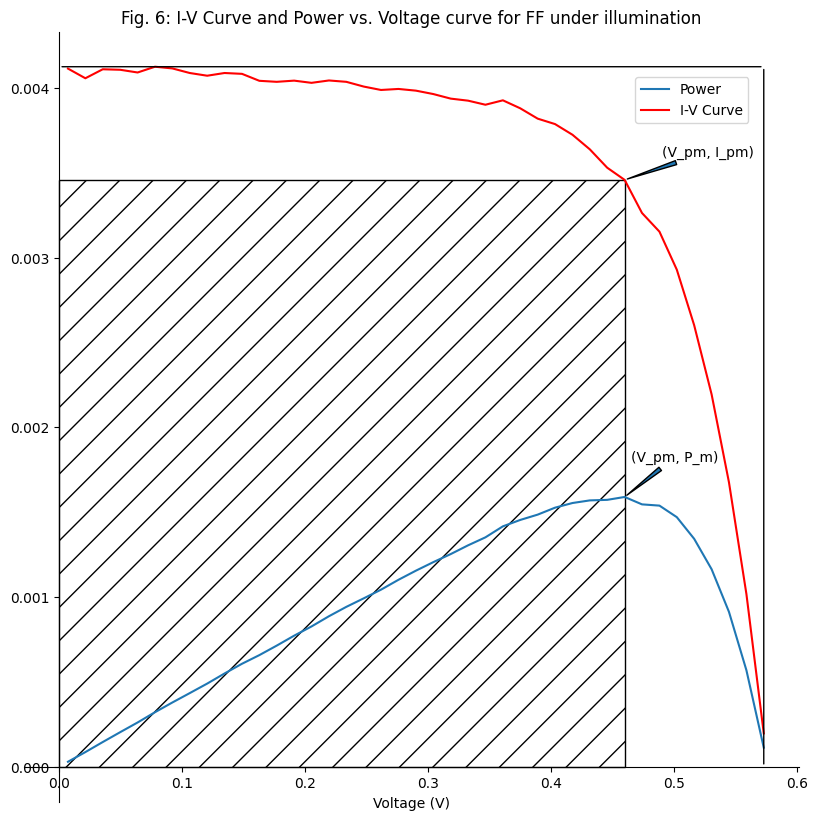

In [19]:
fig6 , ax = plt.subplots(figsize=(10, 10))
ffplt = sns.lineplot(
    data=lght_df.loc[lght_df["Power (W)"] >=0],
    x="Voltage (V)", y="Power (W)", label="Power"
)
mivc = sns.lineplot(
    data=lght_df.loc[
        (lght_df["-Current (A)"] >= 0) &
        (lght_df["Voltage (V)"] >= 0)
    ],
    x="Voltage (V)",
    y="-Current (A)",
    color="r",
    label="I-V Curve"
)
ivx_c = lght_df.loc[(lght_df["-Current (A)"] >= 0) & (lght_df["Voltage (V)"] >= 0)]["Voltage (V)"].max()
ivy_c = lght_df.loc[(lght_df["-Current (A)"] >= 0) & (lght_df["Voltage (V)"] >= 0)]["-Current (A)"].max()
ax.add_patch(Rectangle((0, 0), x_c, -I_pm, fill=False, hatch="/"))
# Adding labels and modifying labels and axes
plt.title("Fig. 6: I-V Curve and Power vs. Voltage curve for FF under illumination")
plt.annotate(
    "", xy=(0, ivy_c), xycoords="data",
    xytext=(ivx_c, ivy_c),
    textcoords="data", arrowprops=dict(arrowstyle="-", connectionstyle="arc3,rad=0.")
)
plt.annotate(
    "", xy=(ivx_c, 0), xycoords="data",
    xytext=(ivx_c, ivy_c),
    textcoords="data", arrowprops=dict(arrowstyle="-", connectionstyle="arc3,rad=0.")
)
plt.annotate(
    "(V_pm, P_m)", xy=(x_c, y_c), xycoords="data", xytext=(0.465, 0.0018),
    textcoords="data", arrowprops=dict(arrowstyle="wedge", connectionstyle="arc3,rad=0.")
)
plt.annotate(
    "(V_pm, I_pm)", xy=(x_c, -I_pm), xycoords="data", xytext=(0.49, 0.0036),
    textcoords="data", arrowprops=dict(arrowstyle="wedge", connectionstyle="arc3,rad=0.")
)
plt.legend(bbox_to_anchor=(0.78, 0.95), loc="upper left")
ax.spines["top"].set_color("none")
ax.spines["bottom"].set_position("zero")
ax.spines["right"].set_color("none")
ax.spines["left"].set_position("zero")
plt.ylabel(None)
plt.show()

Now, we will calculate $η$ with  
$η=\frac{P_{mp}}{P_{in}}$  
where $P_{in}$ will be determined by the characteristics of the incident light spectrum over the cell and by its area.  
It must be expressed as a percentage.

In [20]:
eta = (P_mp / (0.1 * 0.16)) * 100
print(f"η={eta}%")

η=9.93526625%


We have an efficiency of energy conversion of $η=9.93$%.

## Obtaining resistances

Firstly, we will calculate $R_{CH}$ with  


In [21]:
R_ch = (V_pm) / (-I_pm)
print(f"R_ch={R_ch} Ω")

R_ch=132.93811451706188 Ω


We have a characteristic resistance of $R_{CH}=132.94$ $Ω$.

Using the I-V curve of the cell when it is under illumination:

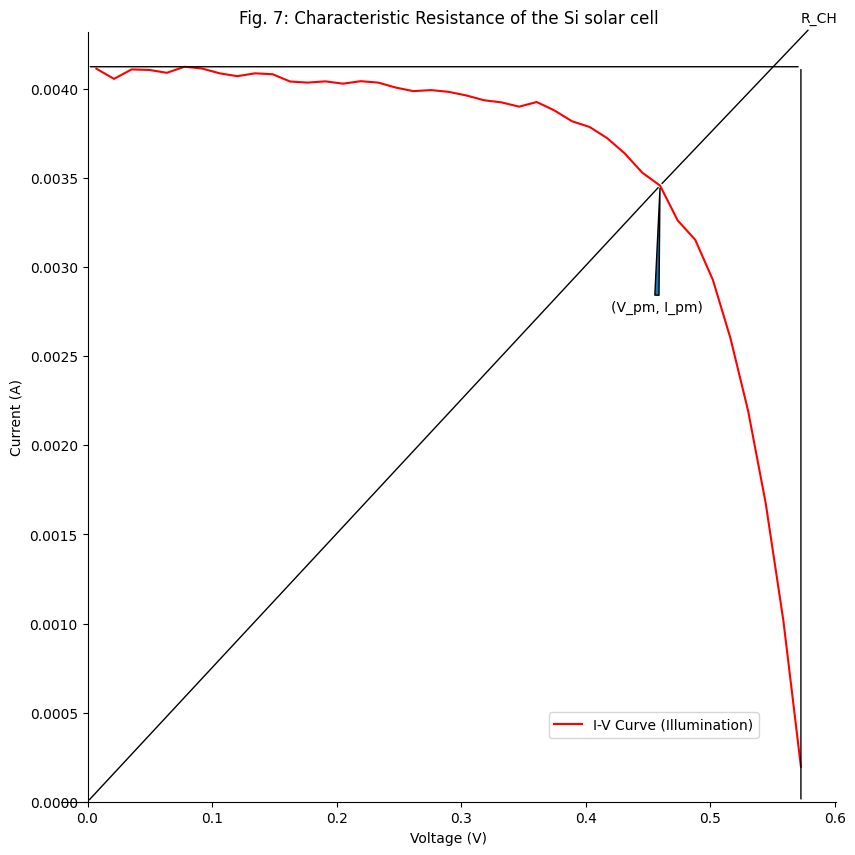

In [22]:
fig7, ax = plt.subplots(figsize=(10, 10))
char_res = sns.lineplot(
    data=lght_df.loc[
        (lght_df["-Current (A)"] >= 0) &
        (lght_df["Voltage (V)"] >= 0)
    ],
    x="Voltage (V)",
    y="-Current (A)",
    color="red",
    label="I-V Curve (Illumination)"
)

plt.title("Fig. 7: Characteristic Resistance of the Si solar cell")
plt.ylabel("Current (A)")
plt.legend(bbox_to_anchor=(0.62, 0.125), loc="upper left")
plt.annotate(
    "", xy=(0, 0), xycoords="data",
    xytext=(x_c, -I_pm),
    textcoords="data", arrowprops=dict(arrowstyle="-", connectionstyle="arc3,rad=0.")
)
plt.annotate(
    "R_CH", xy=(x_c, -I_pm), xycoords="data",
    xytext=(ivx_c, ivy_c + 0.00025),
    textcoords="data", arrowprops=dict(arrowstyle="-", connectionstyle="arc3,rad=0.")
)
plt.annotate(
    "", xy=(0, ivy_c), xycoords="data",
    xytext=(ivx_c, ivy_c),
    textcoords="data", arrowprops=dict(arrowstyle="-", connectionstyle="arc3,rad=0.")
)
plt.annotate(
    "", xy=(ivx_c, 0), xycoords="data",
    xytext=(ivx_c, ivy_c),
    textcoords="data", arrowprops=dict(arrowstyle="-", connectionstyle="arc3,rad=0.")
)
plt.annotate(
    "(V_pm, I_pm)", xy=(x_c, -I_pm), xycoords="data", xytext=(0.42, 0.00275),
    textcoords="data", arrowprops=dict(arrowstyle="wedge", connectionstyle="arc3,rad=0.")
)
ax.spines["top"].set_color("none")
ax.spines["bottom"].set_position("zero")
ax.spines["right"].set_color("none")
ax.spines["left"].set_position("zero")
plt.show()


Now, we will calculate the series resistance $R_{s}$ and the shunt resistance $R_{sh}$.  
For this, we will plot the I-V curve of the cell under illumination and adjust the parts of the curve that present a linear beaviour.  
We can look at Fig. 1 to select which parts will be adjusted.

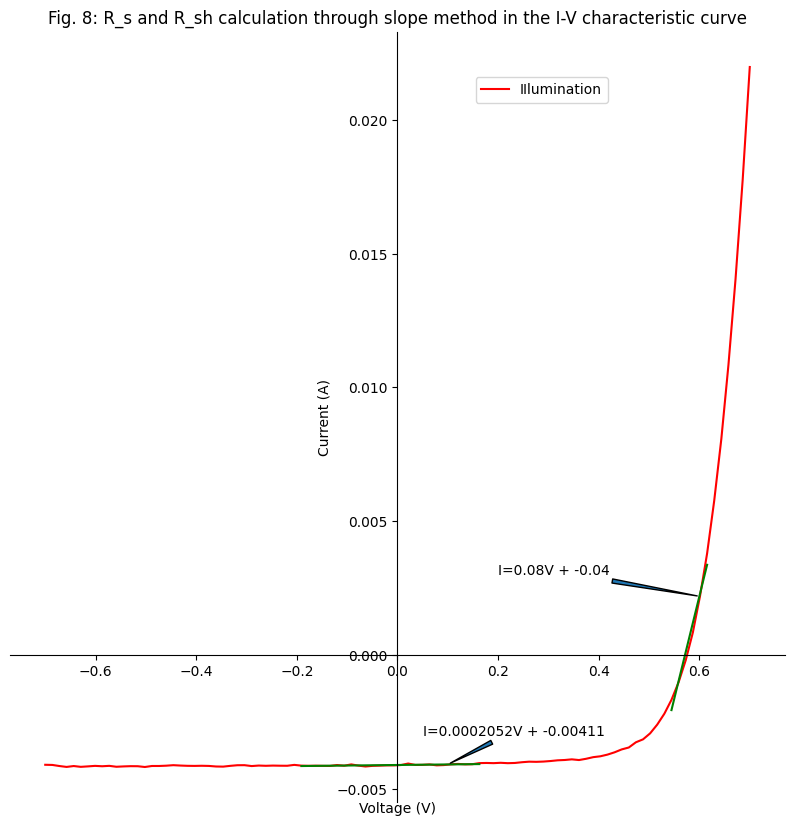

In [23]:
fig8, ax = plt.subplots(figsize=(10, 10))
iliv = sns.lineplot(
    data=lght_df,
    x="Voltage (V)",
    y="Current (A)",
    color="red",
    label="IIlumination"
)

# For quadrants III and IV
slope1, inter1, r, p, se = linregress(
    x=lght_df.loc[
        (lght_df["Voltage (V)"] >= -0.1909) &
        (lght_df["Voltage (V)"] <= 0.1627)]
        ["Voltage (V)"],
    y=lght_df.loc[
        (lght_df["Voltage (V)"] >= -0.1909) &
        (lght_df["Voltage (V)"] <= 0.1627)]
        ["Current (A)"]
)

ax.plot(
    lght_df.loc[
        (lght_df["Voltage (V)"] >= -0.1909) &
        (lght_df["Voltage (V)"] <= 0.1627)]
        ["Voltage (V)"],
    slope1 * lght_df.loc[
        (lght_df["Voltage (V)"] >= -0.1909) &
        (lght_df["Voltage (V)"] <= 0.1627)]
        ["Voltage (V)"] + inter1,
    color="green"
)

plt.annotate(
    f"I={round(slope1, 7)}V + {round(inter1, 5)}", xy=(0.1, -0.004091),
    xycoords="data", xytext=(0.05, -0.003), textcoords="data",
    arrowprops=dict(arrowstyle="wedge", connectionstyle="arc3,rad=0.")
)

# For quadrants I and IV
slope2, inter2, r, p, se = linregress(
    x=lght_df.loc[
        (lght_df["Voltage (V)"] >= 0.5445) &
        (lght_df["Voltage (V)"] <= 0.6153)]
        ["Voltage (V)"],
    y=lght_df.loc[
        (lght_df["Voltage (V)"] >= 0.5445) &
        (lght_df["Voltage (V)"] <= 0.6153)]
        ["Current (A)"]
)

ax.plot(
    lght_df.loc[
        (lght_df["Voltage (V)"] >= 0.5445) &
        (lght_df["Voltage (V)"] <= 0.6153)]
        ["Voltage (V)"],
    slope2 * lght_df.loc[
        (lght_df["Voltage (V)"] >= 0.5445) &
        (lght_df["Voltage (V)"] <= 0.6153)]
        ["Voltage (V)"] + inter2,
    color="green"
)

plt.annotate(
    f"I={round(slope2, 2)}V + {round(inter2, 2)}", xy=(0.6011, 0.00219),
    xycoords="data", xytext=(0.2, 0.003), textcoords="data",
    arrowprops=dict(arrowstyle="wedge", connectionstyle="arc3,rad=0.")
)

plt.title("Fig. 8: R_s and R_sh calculation through slope method in the I-V characteristic curve")
ax.xaxis.set_label_coords(0.5, 0)
ax.spines["top"].set_color("none")
ax.spines["bottom"].set_position("zero")
ax.spines["right"].set_color("none")
ax.spines["left"].set_position("zero")
plt.legend(bbox_to_anchor=(0.78, 0.95), loc="upper right")
plt.show()

Taking the inverse of the calculated slopes for each part:

In [24]:
R_s = 1 / slope2
R_sh = 1 / slope1
print(f"R_s={round(R_s, 2)} Ω, R_sh={round(R_sh, 2)} Ω")

R_s=13.03 Ω, R_sh=4873.5 Ω


We have a value a series resistance of $R_{s}=13.03$ $Ω$ and a shunt resistance of $R_{sh}=4.87$ $kΩ$.

## Conclusions

Solar cells characterization is very important to obtain the electric properties of the material, its behaviour under certain circunstances and it will show the power given.  
In this case, the efficiency of the Si solar cell is of $9.93$%. The fill factor has a value of $66.5$%. A maximum power of $1.59$ $mW$ was calculated.The value for the saturation current is $33.61$ $nA$ and for the ideality factor is 2, therefore we have a recombination current. On the other hand, the short-circuit current has a value of $4.12$ $mA$, while the open-circuit voltage is $579.9$ $mV$. The series resistance and shunt resistance values are $13.03$ $Ω$ and $4.87$ $kΩ$, respectively and they will affect the production of current. Finally, the characteristic resistance is $132.94$ $Ω$.  
The characteristics of the cell and environment will affect in the obtainment of certain parameters of the cell, some of this parameters will be related to the quality of the material and temperature.